<a href="https://colab.research.google.com/github/zzhining/python_ml_dl2/blob/main/answer/6_4_customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제1
[데이터 셋]((https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python))을 불러오고, 아래 항목을 확인하시오.
-	데이터의 행과 열의 구조(shape)
-	상위 5개 항목 출력
-	`Gender`의 유형과 각 유형별 데이터의 개수

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/zzhining/ml_basic/main/dataset/Mall_Customers.csv')

In [2]:
df.shape

(200, 5)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


#문제2
성별(`Gender`)에 따른 연간 소득(`Annual Income`)의 평균을 비교하시오.
- 막대 그래프를 사용하여 시각화 할 것
- x축은 `Gender`, y축은 `Annual Income`으로 설정


<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

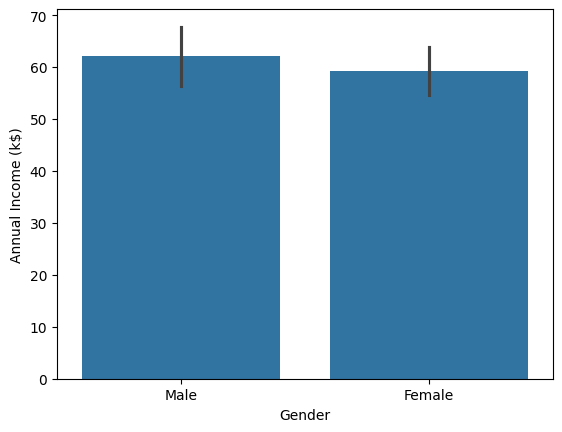

In [5]:
import seaborn as sns

sns.barplot(x= 'Gender',  y = 'Annual Income (k$)', data = df)

# 문제3
성별(`Gender`)에 따른 소비 점수(`Spending Score`)의 분포를 비교하시오.
- 박스 그래프를 사용하여 시각화 할 것
- x축은 `Gender`, y축은 `Spending Score (1-100)`으로 설정

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

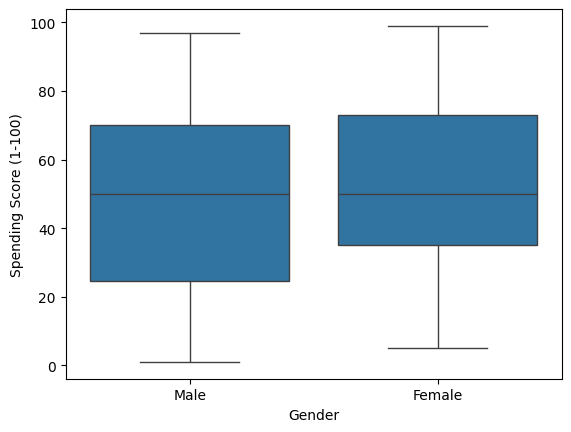

In [6]:
sns.boxplot(x= 'Gender',
            y = 'Spending Score (1-100)',
            data = df)

# 문제4
나이(`Age`)에 따른 연간 소득(`Annual Income`)의 분포를 확인하시오.
- 산점도를 사용하여 시각화 할 것
- x축은 `Age`, y축은 `Annual Income (k$)`으로 설정


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

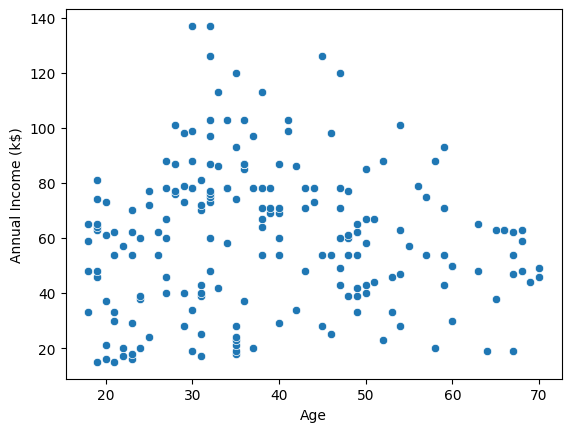

In [7]:
sns.scatterplot(x= 'Age',
                y = 'Annual Income (k$)',
                data = df)

#문제5
나이(`Age`)에 따른 소비 점수(`Spending Score`)의 분포를 확인하시오.
- 산점도를 사용하여 시각화 할 것
- x축은 `Age`, y축은 `Spending Score (1-100)`으로 설정


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

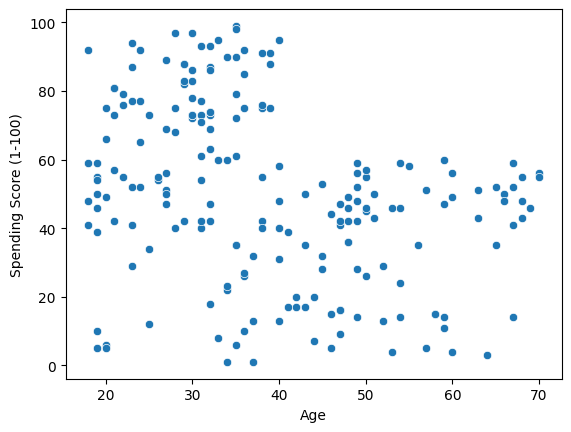

In [8]:
sns.scatterplot(x= 'Age',
                y = 'Spending Score (1-100)',
                data = df)

# 문제6
연간 소득(`Annual Income`)과 소비 점수(`Spending Score`)의 분포를 확인하시오.
- 산점도를 사용하여 시각화 할 것
- x축은 연간 소득(`Annual Income`), y축은 소비 점수(`Spending Score`)으로 설정


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

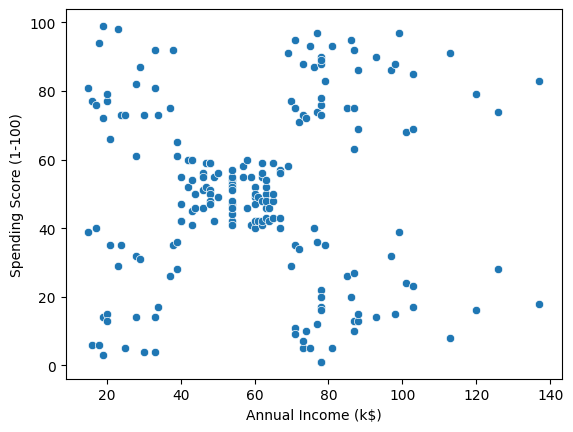

In [9]:
sns.scatterplot(x= 'Annual Income (k$)',
                y = 'Spending Score (1-100)',
                data = df)

# 문제7
데이터 분석에 불필요한 컬럼은 삭제한다. `CustomerID`는 고객을 관리하기 위한 값으로, 데이터 분석에는 사용하지 않는다. 데이터프레임(`df`)에서 `CustomerID` 컬럼을 삭제하시오.

In [10]:
# CustomerID 컬럼 삭제
df.drop(['CustomerID'], axis = 1,inplace = True)

# 문제8
`Gender` 컬럼은은 Male, Female 형태의 문자로 구분되어 있다. 수치형 변수로 변환하시오.
- Male인 경우에는 0, Female인 경우에는 1


In [11]:
# Gender 컬럼 수치형 변수로 변경
df['Gender'] =df['Gender'].apply(lambda x : 0 if x =='Male' else 1)

In [12]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


# 문제9
나이, 연간 소득, 소비 점수의 속성에 대해 `StandardScaler`를 사용하여 데이터의 스케일을 변환하시오

In [13]:
# 스케일 변환
from sklearn.preprocessing import StandardScaler

X= df.iloc[:,1:]
sc = StandardScaler()
X = sc.fit_transform(X)

# 문제10
문제9에서 전처리한 데이터를 사용하여 `KMeans` 클러스터링을 수행하고, 군집 생성 결과에 대해 실루엣 점수를 소수점 넷째자리까지 출력하시오.
-	`KMeans`의 `n_clusters`의 값을 2로 설정



In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

model = KMeans(n_clusters= 2, random_state=42)
y_preds = model.fit_predict(X)
df['cluster'] = y_preds

print('실루엣 점수: {0:.4f}'.format(silhouette_score(X, y_preds)))

실루엣 점수: 0.3355


#문제11
군집 모델의 성능을 개선하기 위해 `KMeans`의 주요 하이퍼파라미터인 `n_clusters` 를 조절하고, 군집개수에 따른 실루엣 점수를 출력하시오.
-	군집개수를 2개부터 11개까지 순차적으로 증가



In [15]:
silhouette_avg = []
for k in range(10):
    model = KMeans(n_clusters= k+2, random_state=42)
    y_preds = model.fit_predict(X)
    score = silhouette_score(X, y_preds)
    silhouette_avg.append(score)
    print("군집개수: {0}개, 평균 실루엣 점수: {1:.4f}"
    .format(k+2, score))

군집개수: 2개, 평균 실루엣 점수: 0.3355
군집개수: 3개, 평균 실루엣 점수: 0.3579
군집개수: 4개, 평균 실루엣 점수: 0.4040
군집개수: 5개, 평균 실루엣 점수: 0.4085
군집개수: 6개, 평균 실루엣 점수: 0.4311
군집개수: 7개, 평균 실루엣 점수: 0.4101
군집개수: 8개, 평균 실루엣 점수: 0.3674
군집개수: 9개, 평균 실루엣 점수: 0.3744
군집개수: 10개, 평균 실루엣 점수: 0.3619
군집개수: 11개, 평균 실루엣 점수: 0.4086


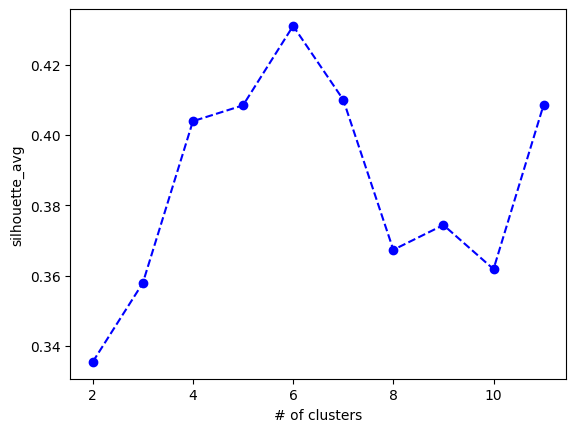

In [17]:
import matplotlib.pyplot as plt

plt.plot(range(2,12), silhouette_avg, 'bo--')
plt.xlabel('# of clusters')
plt.ylabel('silhouette_avg')
plt.show()

#문제12
문제11에서 실루엣 점수가 가장 높은 클러스터의 수로 군집 모델을 생성하고, 생성된 군집에 따라 색상을 달리하여 시각화하시오. 시각화 결과를 해석하고, 각 군집에 적합한 네이밍을 하시오.
-	시각화 방법: 산점도
-	X축: 'Annual Income (k$)'
-	Y축: 'Spending Score (1-100)'


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

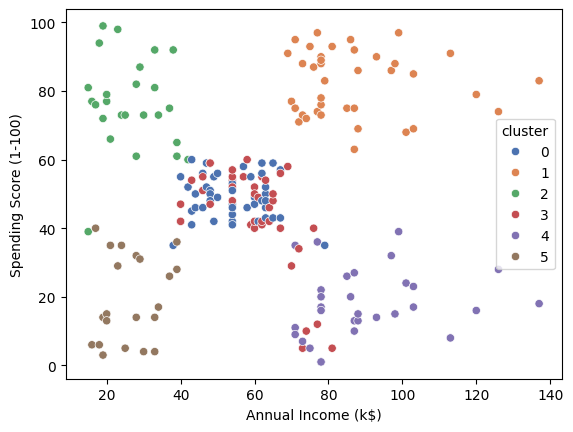

In [18]:
model = KMeans(n_clusters= 6, random_state=42)
y_preds = model.fit_predict(X)
df['cluster'] = y_preds

sns.scatterplot(x = 'Annual Income (k$)',
                y = 'Spending Score (1-100)',
                data = df, hue = 'cluster',
                palette="deep")

#문제13
문제12에서 생성한 클러스터의 수가 실무에서 관리하기에 많은 수라고 판단되어 클러스터의 수를 조정하려고 한다. 생성한 클러스터의 수보다 1개 적을 때, 2개 적을 때 각각의 실루엣 점수를 확인하고, 각 군집별 실루엣 점수를 시각화 하시오.
-	군집별 실루엣 점수 시각화 방법: `plotSihouette(k, y_preds)`함수 사용
-	`k`: 클러스터의 수
-	`y_preds`: 할당된 클러스터 값


In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score

def plotSilhouette(n_clusters, y_preds):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)
    y_lower = 10
    silhouette_avg = silhouette_score(X, y_preds)
    sample_silhouette_values = silhouette_samples(X, y_preds)
    print("군집개수: {0}개, 평균 실루엣 점수: {1:.4f}".format(k, silhouette_avg))

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[y_preds == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the {0} clusters.".format(n_clusters))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

군집개수: 4개, 평균 실루엣 점수: 0.4040


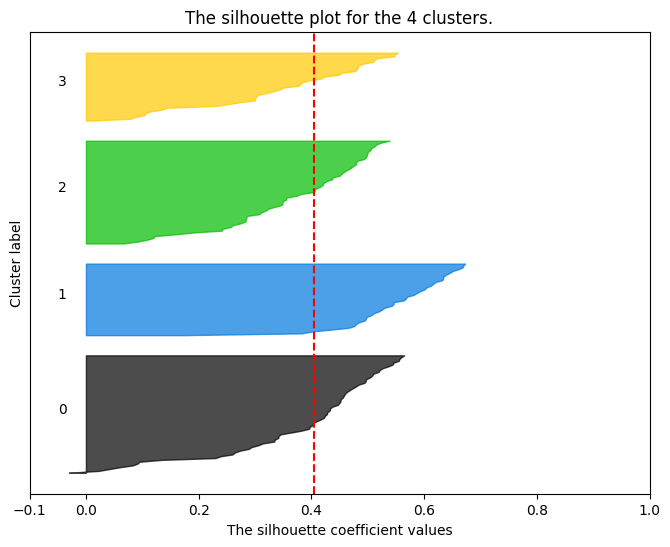

군집개수: 5개, 평균 실루엣 점수: 0.4085


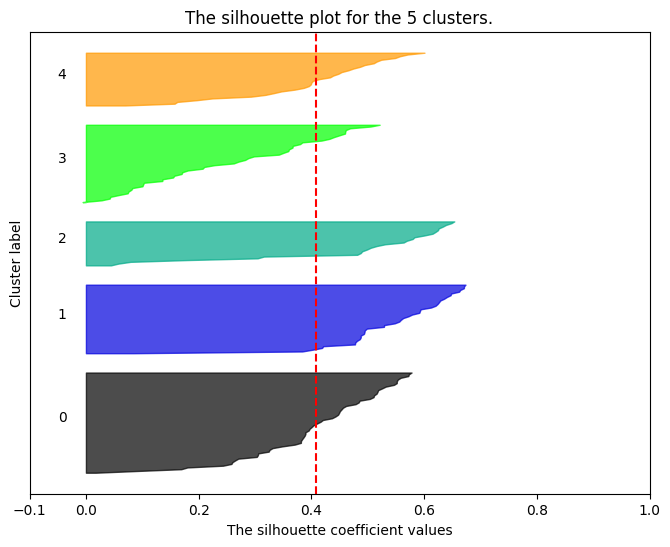

군집개수: 6개, 평균 실루엣 점수: 0.4311


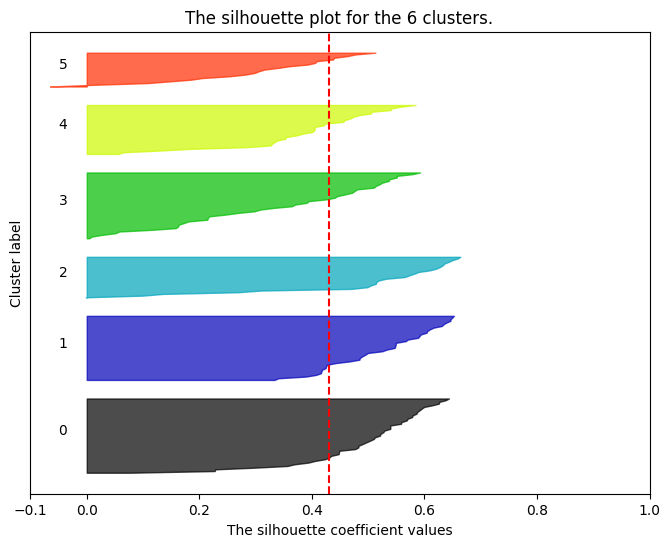

In [20]:
import matplotlib.cm as cm
k_list = [4, 5, 6]
for k in k_list:
    model = KMeans(n_clusters= k, random_state=42)
    y_preds = model.fit_predict(X)
    plotSilhouette(k, y_preds)